In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('MountainCar-v0')
env.reset()

observation_space_size = [20] * len(env.observation_space.high)
observation_space_window_size = (env.observation_space.high - env.observation_space.low) / observation_space_size
Q_Table = np.random.uniform(low=-2,high=0,size =(observation_space_size + [env.action_space.n]))

### Lets define our Learning Rate and discount

In [10]:
#Learning Rate here = alpha
alpha = 0.1
#discount is basically like weight which tells us how much important are the future actions/ new rewards vs old reward
discount = 0.95
episodes = 800

### Function to convert Continuous states to discrete states

In [4]:
def disc_states(state):
    discrete_state = (state - env.observation_space.low)/observation_space_window_size
    return tuple(discrete_state.astype(int))

In [5]:
discrete_state = disc_states(env.reset())
print(discrete_state)

(7, 10)


In [6]:
Q_Table[discrete_state]

array([-0.06110074, -1.49670029, -1.61792131])

#### How the algo works is that it takes the max value from the array

In [7]:
action_test = np.argmax(Q_Table[discrete_state])
action_test

0

* Means we should go with action 2

#### Current Q_Val

In [8]:
current_q_val    = Q_Table[discrete_state + (action_test, )]
current_q_val

-0.06110073606907984

#### Max_Q_Value

1. Maximum possible Q value in next step (for new state)
2. Code Won't run as new_discrete state is undefined to find this state we first need the new_state found after rendering the environment
#### max_future_q_val_test = np.max(Q_Table[new_discrete_state])

## Combining and using it to create our Q-Function

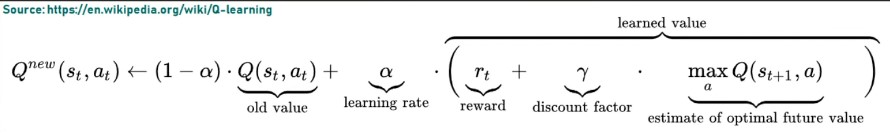

In [11]:
env = gym.make('MountainCar-v0')
env.reset()
#is_alive is used just to check if the environment is still working or it has stopped responding can be skipped as well
is_alive = 200

for episode in range(episodes):
    if(episode % is_alive ==0):
        print(episode)
        render = True
    else:
        render = False

    
    discrete_state = disc_states(env.reset())
    Q_Table[discrete_state]

    done = False
    while not done:
        #action = max Q-Value 
        action = np.argmax(Q_Table[discrete_state])  
        new_state , reward , done , _ = env.step(action)
        #Used for finding new q-values
        new_discrete_state = disc_states(new_state)
        
        if render:
            env.render()
        
        #if the simulation didn't ended after the last step update the Q-Table using the Q-Function
        if not done:
            
            #Finding the max Q_Val (estimate of optimal future value)
            max_future_q_val = np.max(Q_Table[new_discrete_state])
            
            current_q_val    = Q_Table[discrete_state + (action, )]
            
            #Q-Function
            new_q_val = (1-alpha) * current_q_val + alpha * (reward + discount * max_future_q_val)
            
            #Updating Q_Table
            Q_Table[discrete_state+(action, )] = new_q_val
        
        #If the simulation is ended(goal state reached can be a reason) then update the Q-Table with the reward i.e., 0
        elif new_state[0] >= env.goal_position:
            
            print(f"Goal state reached: {episode}")
            Q_Table[discrete_state+(action, )] = 0
        
        discrete_state = new_discrete_state
env.close()

0
Goal state reached: 84
Goal state reached: 91
Goal state reached: 93
Goal state reached: 99
Goal state reached: 103
Goal state reached: 112
Goal state reached: 170
Goal state reached: 177
Goal state reached: 184
200
Goal state reached: 203
Goal state reached: 204
Goal state reached: 205
Goal state reached: 206
Goal state reached: 209
Goal state reached: 211
Goal state reached: 213
Goal state reached: 214
Goal state reached: 217
Goal state reached: 218
Goal state reached: 219
Goal state reached: 354
Goal state reached: 356
Goal state reached: 379
Goal state reached: 380
Goal state reached: 384
Goal state reached: 385
Goal state reached: 386
Goal state reached: 387
Goal state reached: 388
Goal state reached: 391
Goal state reached: 392
Goal state reached: 393
Goal state reached: 394
Goal state reached: 395
Goal state reached: 396
Goal state reached: 397
Goal state reached: 398
Goal state reached: 399
400
Goal state reached: 406
Goal state reached: 407
Goal state reached: 408
Goal state

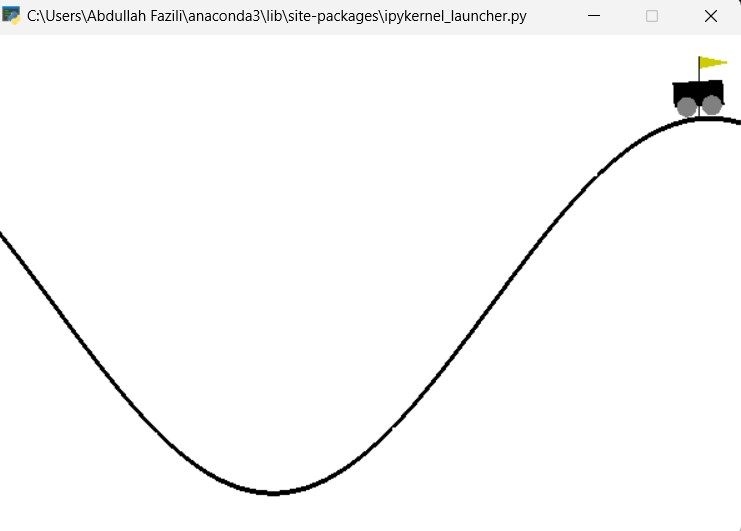